## Position of a particle 

The IBM Q quantum computer is a remarkable quantum experiment, which we can set up and run using Jupyter Nootebooks just as this. In this experiment we want to find the **position of a particle**. Particles in the realm of quantum mechanics is quite different from what we would expect from a classical perspective. Lets see how! 

Say we have 5 equal sized sections the particle can be in. In which section is the particle located? 


![From Wikipedia, the free encyclopedia](boxes.png)


First, we need to import the relevent libraries:

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from IPython.display import display, Latex

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

We set up the experiment (don't mind the code here. Just like we don't worry too much about measurement devices work when we do experiments in the lab)

In [ ]:
#initialising a quantum circuit. 
def initial(N,M):
    q = QuantumRegister(N) #N is th number of qubits
    c = ClassicalRegister(M) #M is the number of bits
    qc = QuantumCircuit(q,c)
    return qc

#make desired state
def state(liste,qc): 
    C = np.array(liste) #len(C) is the number of states. 

    N = len(C)
    H_d = 2**N
    
    fullstate = np.zeros(H_d)
    for k in range(N):
        fullstate[(1 << k) ]+=C[k]
        
    norm = np.linalg.norm(fullstate)
    fullstate = fullstate/norm
    return qc.initialize(fullstate.tolist(), qc.qubits)

def measureall(q0,c0,qc,N):
    q = np.linspace(q0,q0+N-1,N,dtype=int).tolist() #list for q-bits
    c = np.linspace(c0,c0+N-1,N,dtype=int).tolist() #list for classic bits
    return qc.measure(q,c)

Now how do we describe the particle and its initial values? In quantum mechanics, we do this with its *wavefunction*.

**Exercise 1** Initialize the state of the particle to <code>liste = [1,1,1,1,1]</code> and then run the experiment (the next secton of code)

In [ ]:
######The state of the particle:
liste = []
######

#Setting up the experiment
N=len(liste) #number of qubits
qc = initial(N,N)
n = np.linspace(0,N-1,N,dtype=int).tolist()

state(liste,qc) #the wave function in the form [..., q5,q4,q3,q2,q1,q0]

qc.barrier() # and now measure the position
measureall(0,0,qc,N)

simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=1, memory=True).result()
memory = result.get_memory(qc)
counts = result.get_counts()

for i in range(N):
#    print(f"{memory[0][i]}")
    if memory[0][i] == "1":
        position = i
print()
print(memory[0])
display(Latex(f'Dectected at position $x = {position}a$'))    

Great, now we know where the particle is! But what if we had another particle in the same wave function and measured its position. Do we get the same answer? 

**Exercise 2:** Run the code multiple times. What answers do you get? What does this mean?

**Don't miss:** the experiment is the exact same this time. The particle in the first experiment is described exactly the same way as the second time. 

<details>
    <summary>Click once here when your done with exercise 2</summary>
It seems like the position of the particle is <b>not</b> the same even when we have particles with the same wave function! That's the same as if we took the same kind of ball, throwing it with the same catapult and the same weather conditions, but each ball do not end up the same place. 
</details> 

<p style="margin-bottom:1mm;"></p>

**Exercise 3:** Try to change the wave function of the system. How can you make sure that the particle won't be detected at <code>x=1a</code>?

You can play around with this, see if you can see the connection between the _wave function_ you initialize with the list <code>liste</code> and your _measurement_. To make it easier, we can conduct <code>N=1024</code> experiments at a time! (good thing that this is easy to do on a quantum computer compared to in real life!)

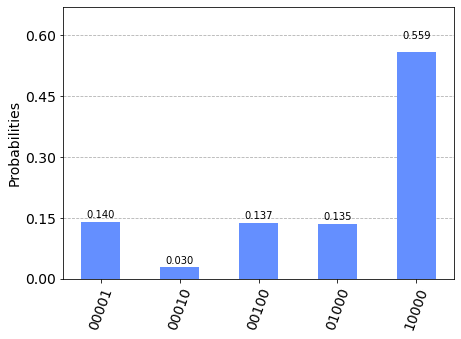

In [19]:
sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(qc)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

When you feel like you understand the connection between the state and the outcome of measurement (or wants to see the right answer), then look at the tap below, where we will reveal the mysteries of quantum states!

<details>
    <summary> <b> Quantum states: the wave function</b> </summary>
The state you experimented with is actually the **wave function** $\Psi(x,t)$ of a quantum system: instead of describing observables like position, it explains the <b>probalility</b> of the position. In our experiment, the wave function is a discrete function of both space and time (but we only considered a single fixed time $t=0$).One wave function could be: 

<p style="margin-bottom:1mm;"></p>
    
\begin{eqnarray}
\Psi_1(x_0,t=0) & = & 0 \\ 
\Psi_1(x_1,t=0) & = & 0 \\
\Psi_1(x_2,t=0) & = & 1/\sqrt{2} \\ 
\Psi_1(x_3,t=0) & = & 1/\sqrt{2} \\ 
\Psi_1(x_4,t=0) & = & 0 \\ 
\Psi_1(x_5,t=0) & = & 0 \ .
\end{eqnarray}

The probability of finding the particle at $x_1$ would then be the coeffient (eq. 2.19 in Griffiths and Schroeter)
\begin{equation}
    |\Psi(x_2,t=0)|^2=\frac{1}{2}
\end{equation}
The wave function must normalized, that is, it must satisfy 
\begin{equation}
\sum_{x_j=0}^{5}|\Psi(x_j,t=0)|^2 = 1 \ .
\end{equation}
Other quantum systems can easily be contious and not confined to <code>N</code> boxes: In this case we'll have
$\Psi(x,t=0)$ instead of $\Psi(x_j,t=0)$ where $x_j=0, 1, 2, \ldots$.
</details>